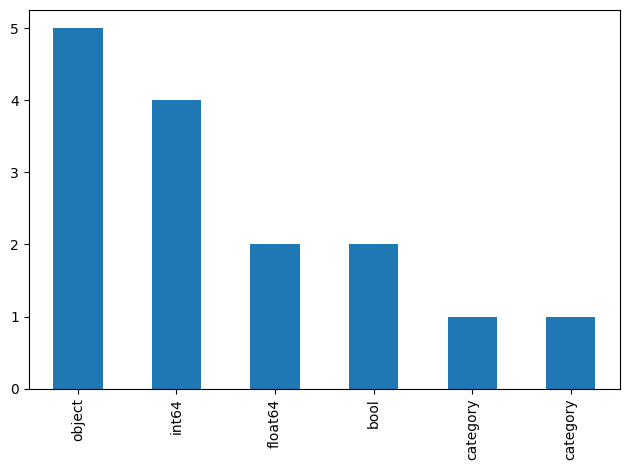

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config

set_config(transform_output="pandas")

df = sns.load_dataset("titanic")
df.dtypes.value_counts().plot(kind="bar")
plt.tight_layout()

In [2]:
X = df[["sex", "age", "class", "embark_town", "fare"]]
y = df.alive
y

0       no
1      yes
2      yes
3      yes
4       no
      ... 
886     no
887    yes
888     no
889    yes
890     no
Name: alive, Length: 891, dtype: object

<Axes: >

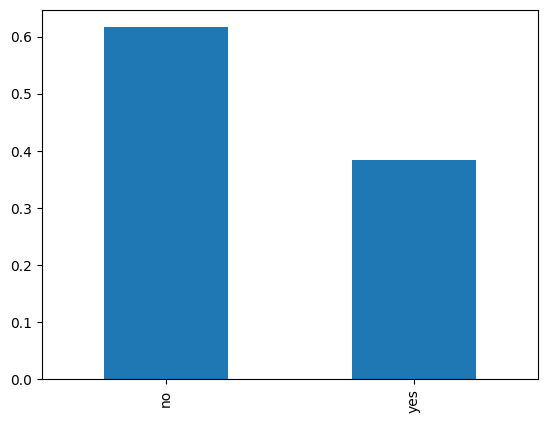

In [3]:
y.value_counts(normalize=True).plot(kind="bar")

In [4]:
import numpy as np

num_vars = X.select_dtypes(np.number).columns.tolist()
cat_vars = [col for col in X.columns if col not in num_vars]
cat_vars

['sex', 'class', 'embark_town']

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

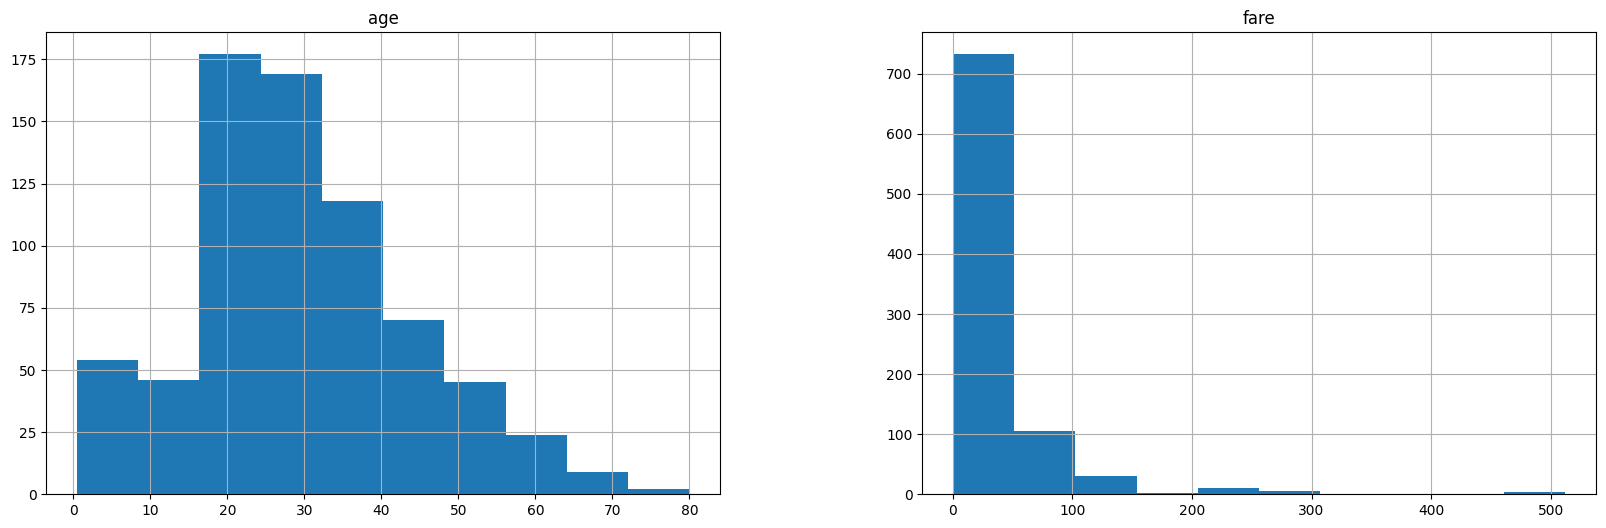

In [5]:
X[num_vars].hist(figsize=(20, 6))

In [6]:
X.groupby("age").fare.mean()

age
0.42       8.5167
0.67      14.5000
0.75      19.2583
0.83      23.8750
0.92     151.5500
           ...   
70.00     40.7500
70.50      7.7500
71.00     42.0792
74.00      7.7750
80.00     30.0000
Name: fare, Length: 88, dtype: float64

In [7]:
df["rango_edad"] = pd.cut(X["age"], 5)
df.groupby("rango_edad").fare.median()

rango_edad
(0.34, 16.336]      26.00000
(16.336, 32.252]    10.50000
(32.252, 48.168]    24.86875
(48.168, 64.084]    29.70000
(64.084, 80.0]      26.55000
Name: fare, dtype: float64

In [8]:
df.groupby("rango_edad").fare.mean()

rango_edad
(0.34, 16.336]      31.588877
(16.336, 32.252]    28.260499
(32.252, 48.168]    42.788940
(48.168, 64.084]    50.327235
(64.084, 80.0]      28.905691
Name: fare, dtype: float64

<Axes: >

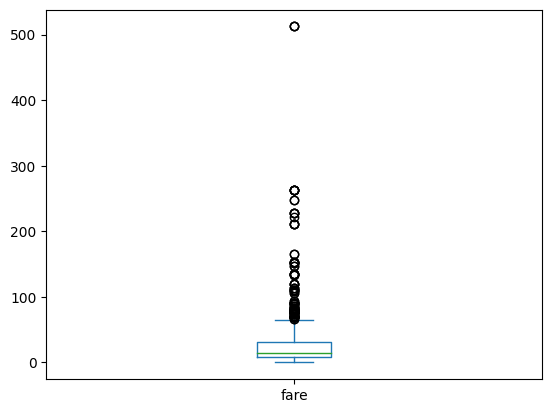

In [9]:
df.fare.plot(kind="box")

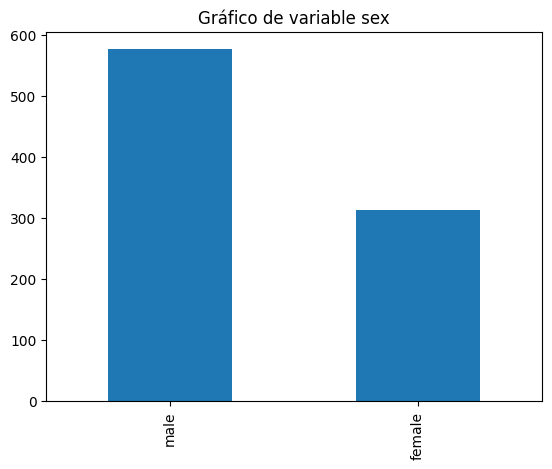

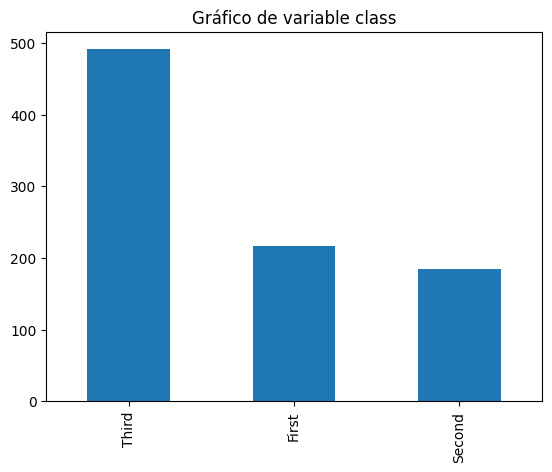

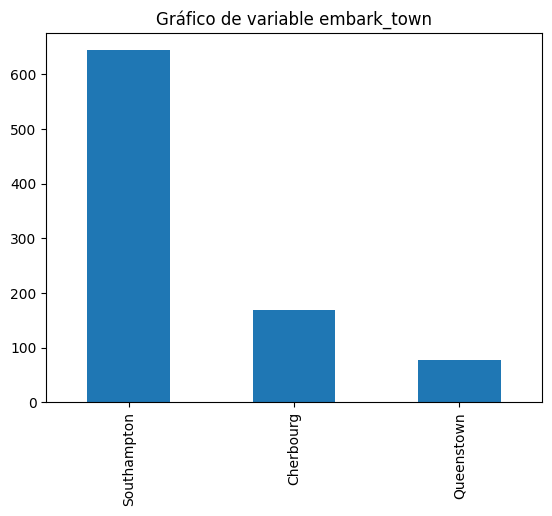

In [10]:
for cat in cat_vars:
    X[cat].value_counts().plot(
        kind="bar", title=f"Gráfico de variable {cat}"
    )
    plt.show()

In [11]:
X.groupby("class").fare.mean()

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

## Preprocesamiento


In [12]:
X

,sex,age,class,embark_town,fare
0,male,22.0,Third,Southampton,7.2500
1,female,38.0,First,Cherbourg,71.2833
2,female,26.0,Third,Southampton,7.9250
3,female,35.0,First,Southampton,53.1000
4,male,35.0,Third,Southampton,8.0500
...,...,...,...,...,...
886,male,27.0,Second,Southampton,13.0000
887,female,19.0,First,Southampton,30.0000
888,female,NaN,Third,Southampton,23.4500
889,male,26.0,First,Cherbourg,30.0000


<Axes: >

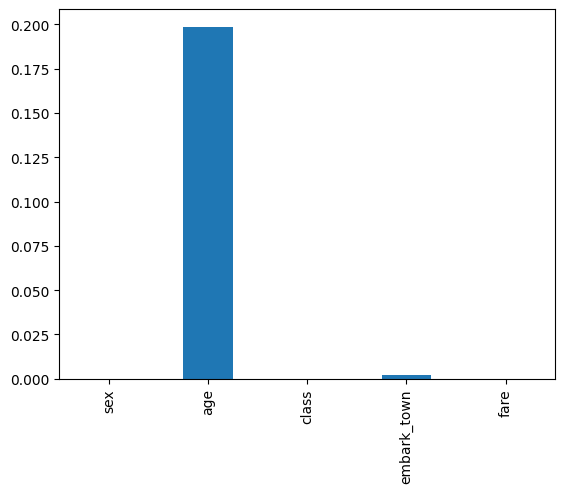

In [13]:
X.isnull().mean().plot(kind="bar")

In [14]:
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder
from feature_engine.imputation import CategoricalImputer, MeanMedianImputer

mmi = MeanMedianImputer(imputation_method="mean")
X_imp = mmi.fit_transform(X)

ci = CategoricalImputer(imputation_method="frequent")
X_imp = ci.fit_transform(X_imp)
X_imp

,sex,age,class,embark_town,fare
0,male,22.000000,Third,Southampton,7.2500
1,female,38.000000,First,Cherbourg,71.2833
2,female,26.000000,Third,Southampton,7.9250
3,female,35.000000,First,Southampton,53.1000
4,male,35.000000,Third,Southampton,8.0500
...,...,...,...,...,...
886,male,27.000000,Second,Southampton,13.0000
887,female,19.000000,First,Southampton,30.0000
888,female,29.699118,Third,Southampton,23.4500
889,male,26.000000,First,Cherbourg,30.0000


In [15]:
ohe = OneHotEncoder(variables=["sex", "embark_town"])
X_enc = ohe.fit_transform(X_imp)
od = OrdinalEncoder(encoding_method="arbitrary")
X_enc = od.fit_transform(X_enc)
X_enc

,age,class,fare,sex_male,sex_female,embark_town_Southampton,embark_town_Cherbourg,embark_town_Queenstown
0,22.000000,0,7.2500,1,0,1,0,0
1,38.000000,1,71.2833,0,1,0,1,0
2,26.000000,0,7.9250,0,1,1,0,0
3,35.000000,1,53.1000,0,1,1,0,0
4,35.000000,0,8.0500,1,0,1,0,0
...,...,...,...,...,...,...,...,...
886,27.000000,2,13.0000,1,0,1,0,0
887,19.000000,1,30.0000,0,1,1,0,0
888,29.699118,0,23.4500,0,1,1,0,0
889,26.000000,1,30.0000,1,0,0,1,0


In [16]:
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper

sc = SklearnTransformerWrapper(StandardScaler(), variables=["age", "fare"])
X_sc = sc.fit_transform(X_enc)

In [17]:
sc_all = StandardScaler()
X_sc_all = sc_all.fit_transform(X_enc)
X_sc_all

,age,class,fare,sex_male,sex_female,embark_town_Southampton,embark_town_Cherbourg,embark_town_Queenstown
0,-0.592481,-0.820037,-0.502445,0.737695,-0.737695,0.615838,-0.482043,-0.307562
1,0.638789,0.431081,0.786845,-1.355574,1.355574,-1.623803,2.074505,-0.307562
2,-0.284663,-0.820037,-0.488854,-1.355574,1.355574,0.615838,-0.482043,-0.307562
3,0.407926,0.431081,0.420730,-1.355574,1.355574,0.615838,-0.482043,-0.307562
4,0.407926,-0.820037,-0.486337,0.737695,-0.737695,0.615838,-0.482043,-0.307562
...,...,...,...,...,...,...,...,...
886,-0.207709,1.682199,-0.386671,0.737695,-0.737695,0.615838,-0.482043,-0.307562
887,-0.823344,0.431081,-0.044381,-1.355574,1.355574,0.615838,-0.482043,-0.307562
888,0.000000,-0.820037,-0.176263,-1.355574,1.355574,0.615838,-0.482043,-0.307562
889,-0.284663,0.431081,-0.044381,0.737695,-0.737695,-1.623803,2.074505,-0.307562


In [18]:
from sklearn.neighbors import KNeighborsClassifier


def knn(X, y, k=3):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X, y)
    print(f"Puntaje para k = {k}: {knn.score(X, y)}")


for k in [3, 5, 7, 9, 11, 13, 15]:
    knn(X_sc, y, k=k)

Puntaje para k = 3: 0.8843995510662177
Puntaje para k = 5: 0.8686868686868687
Puntaje para k = 7: 0.8608305274971941
Puntaje para k = 9: 0.8428731762065096
Puntaje para k = 11: 0.835016835016835
Puntaje para k = 13: 0.8249158249158249
Puntaje para k = 15: 0.819304152637486


In [21]:
for k in [3, 5, 7, 9, 11, 13, 15]:
    knn(X_sc_all, y, k=k)

Puntaje para k = 3: 0.8866442199775533
Puntaje para k = 5: 0.8698092031425365
Puntaje para k = 7: 0.8552188552188552
Puntaje para k = 9: 0.8383838383838383
Puntaje para k = 11: 0.835016835016835
Puntaje para k = 13: 0.8282828282828283
Puntaje para k = 15: 0.8237934904601572


In [23]:
for k in [3, 5, 7, 9, 11, 13, 15]:
    knn(X_enc, y, k=k)

Puntaje para k = 3: 0.8372615039281706
Puntaje para k = 5: 0.8204264870931538
Puntaje para k = 7: 0.7867564534231201
Puntaje para k = 9: 0.7721661054994389
Puntaje para k = 11: 0.7676767676767676
Puntaje para k = 13: 0.7575757575757576
Puntaje para k = 15: 0.7508417508417509


In [22]:
X_enc

,age,class,fare,sex_male,sex_female,embark_town_Southampton,embark_town_Cherbourg,embark_town_Queenstown
0,22.000000,0,7.2500,1,0,1,0,0
1,38.000000,1,71.2833,0,1,0,1,0
2,26.000000,0,7.9250,0,1,1,0,0
3,35.000000,1,53.1000,0,1,1,0,0
4,35.000000,0,8.0500,1,0,1,0,0
...,...,...,...,...,...,...,...,...
886,27.000000,2,13.0000,1,0,1,0,0
887,19.000000,1,30.0000,0,1,1,0,0
888,29.699118,0,23.4500,0,1,1,0,0
889,26.000000,1,30.0000,1,0,0,1,0
